In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [6]:
data = pd.read_csv('C:/Users/user/Desktop/kc_house_data.csv')

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [216]:
list(data.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long']

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


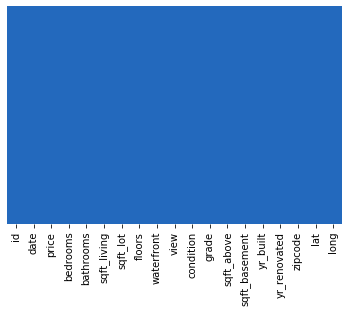

In [9]:
sns.heatmap(data.isnull(), yticklabels= False, cbar=False, cmap= 'vlag')

In [11]:
data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [12]:
features = ['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long']

# Corrletion Matrix:

In [13]:
mask=np.zeros_like(data[features].corr(),dtype=np.bool) #shows whether the features are correlated or not in the form of an array
mask[np.triu_indices_from(mask)]=True
#converts the upper triangular matrux to true from false

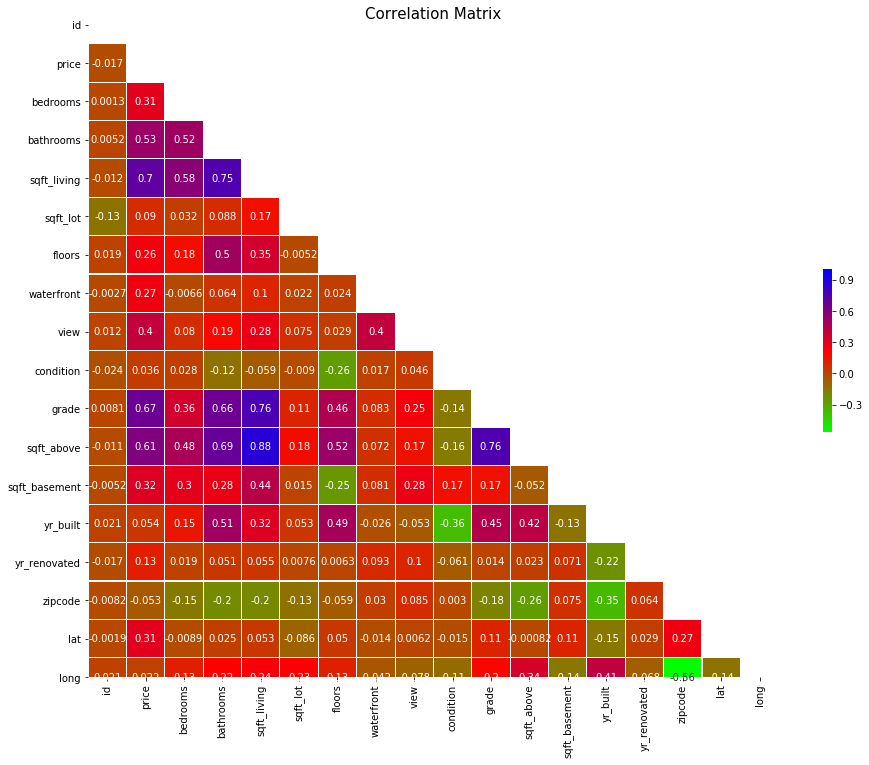

In [15]:
f,ax=plt.subplots(figsize=(16,12))
plt.title('Correlation Matrix',fontsize=15)

sns.heatmap(data[features].corr(), linewidths=0.10, vmax=1.0, square=True, cmap="brg_r", linecolor='w', annot=True, 
            mask=mask, cbar_kws={"shrink": 0.25})

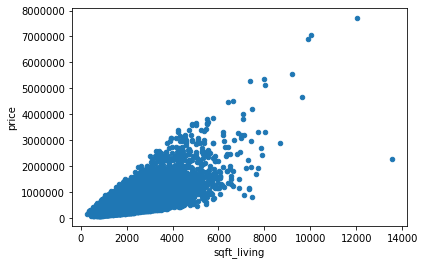

In [222]:
data.plot(kind='scatter', x = 'sqft_living', y = 'price');
plt.show()

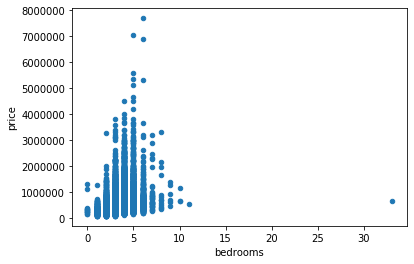

In [33]:
data.plot(kind='scatter', y = 'price', x = 'bedrooms');
plt.show()

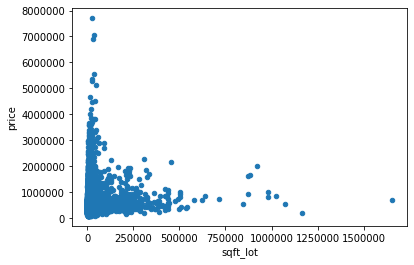

In [34]:
data.plot(kind='scatter', y = 'price', x = 'sqft_lot');
plt.show()

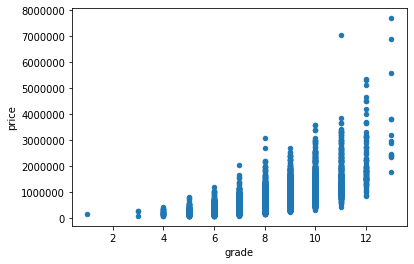

In [35]:
data.plot(kind='scatter', y = 'price', x = 'grade');
plt.show()

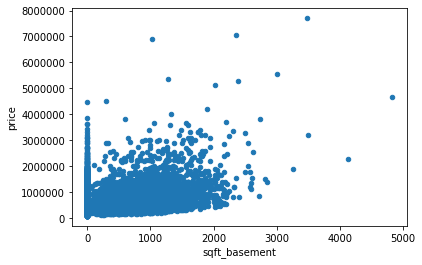

In [36]:
data.plot(kind='scatter', y = 'price', x = 'sqft_basement');
plt.show()

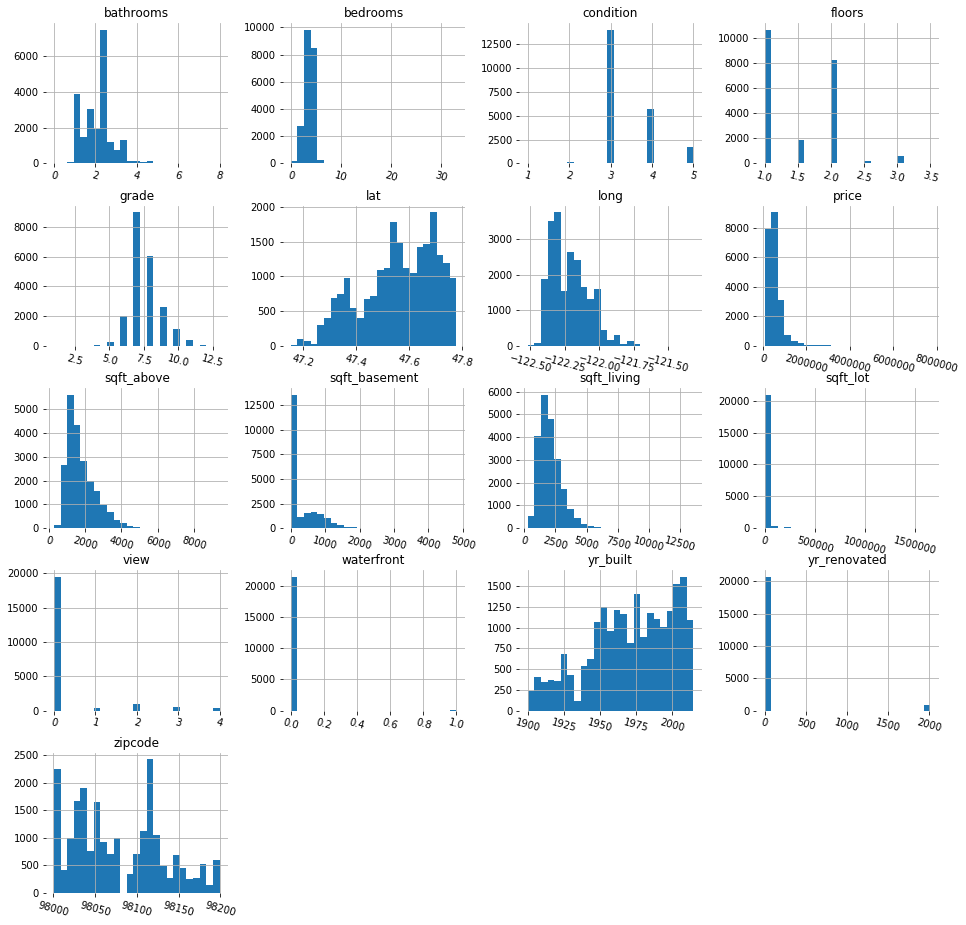

In [223]:
data1=data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']]
h = data1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

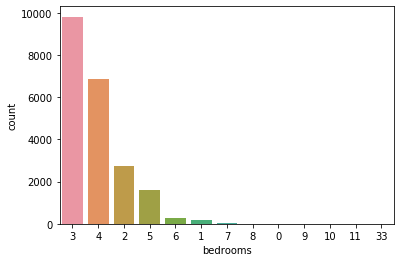

In [89]:
sns.countplot(data.bedrooms, order = data['bedrooms'].value_counts().index)

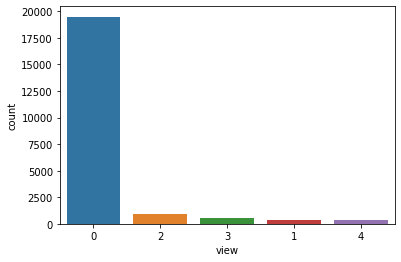

In [91]:
sns.countplot(data.view, order = data['view'].value_counts().index)

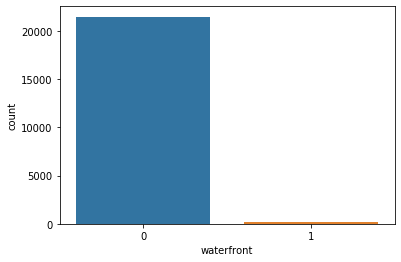

In [93]:
sns.countplot(data.waterfront, order = data['waterfront'].value_counts().index)

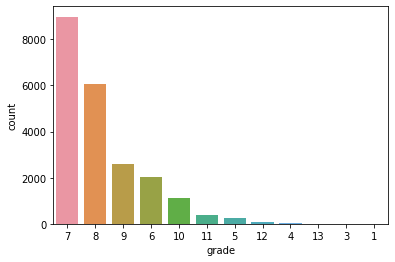

In [95]:
sns.countplot(data.grade, order = data['grade'].value_counts().index)

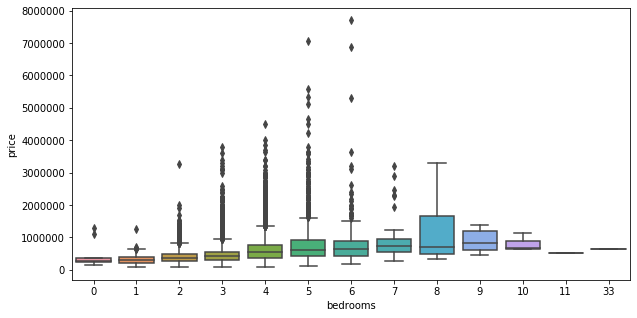

In [224]:
f, axe = plt.subplots(1, 1,figsize=(10,5))
sns.boxplot(x=data['bedrooms'],y=data['price'],ax=axe)

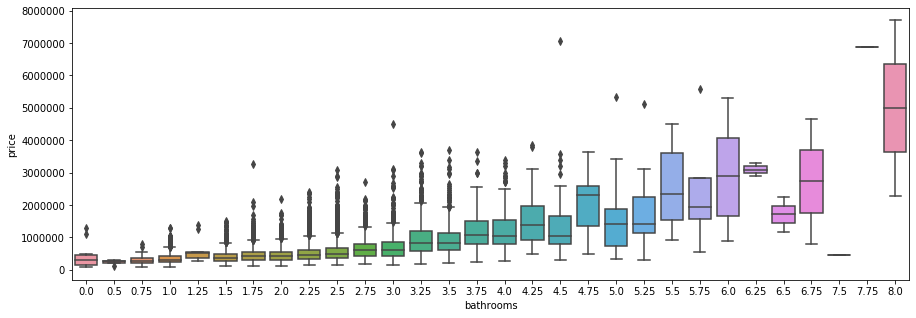

In [225]:
f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=data['bathrooms'],y=data['price'],ax=axe)

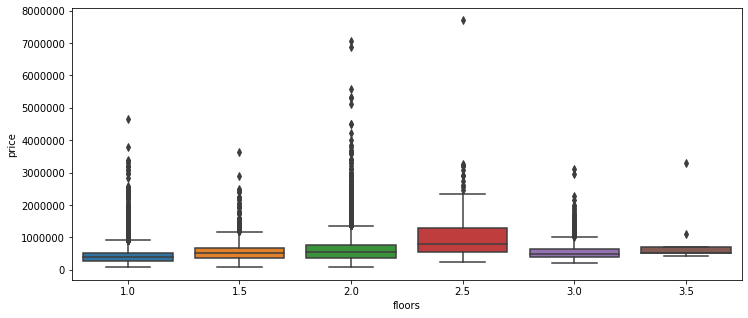

In [69]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=data['floors'],y=data['price'],ax=axe)

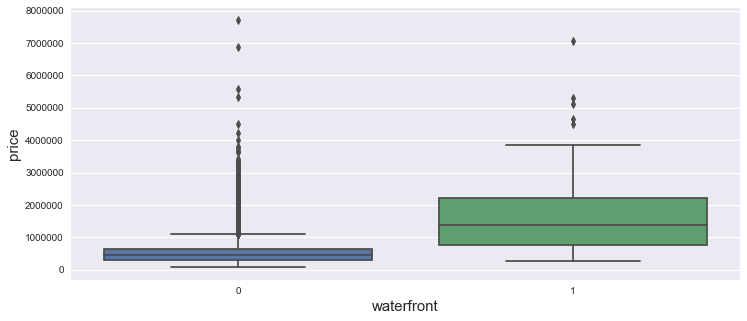

In [395]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=data['waterfront'],y=data['price'],ax=axe)

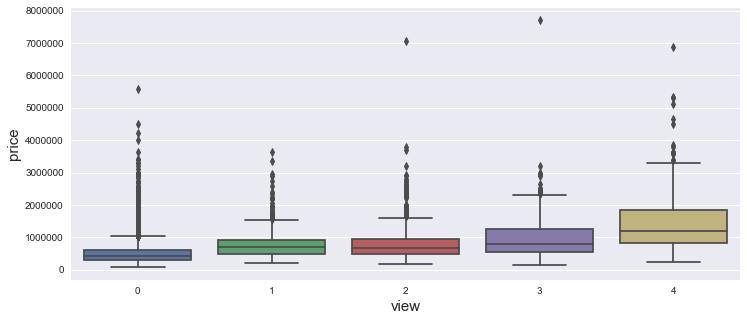

In [396]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=data['view'],y=data['price'],ax=axe)

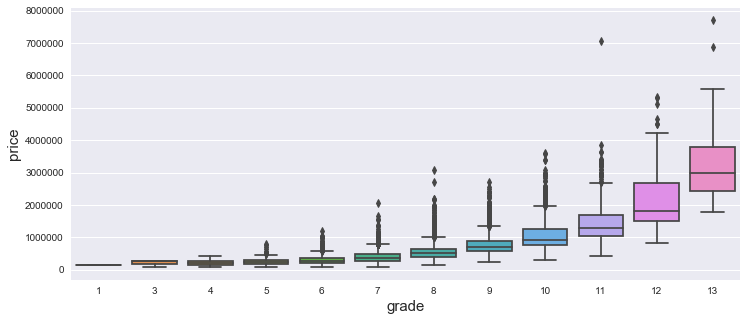

In [397]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=data['grade'],y=data['price'],ax=axe)

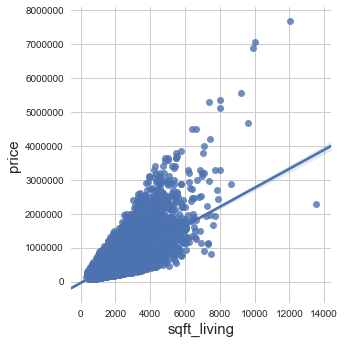

In [401]:
sns.set_style('whitegrid') 
sns.lmplot(x ='sqft_living', y ='price', data = data)

In [470]:
sns.set_style('whitegrid') 
sns.lmplot(x ='long', y ='lat', data = data,  
           hue ='grade', markers =['0',1','2','3','4','5','6','7','8','9','10','11']) 

SyntaxError: invalid syntax (<ipython-input-470-cd8cce03b14c>, line 3)

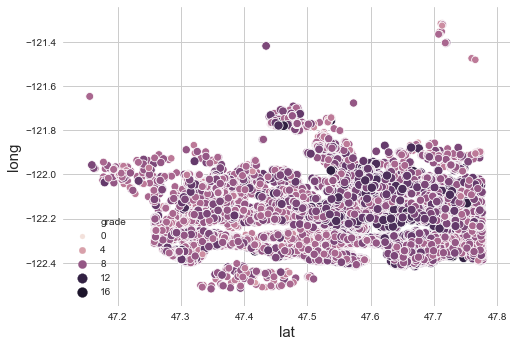

In [471]:
cmap = sns.cubehelix_palette(dark=.1, light=.9, as_cmap=True)
ax = sns.scatterplot(x="lat", y="long",
                     hue="grade", size="grade",
                     palette=cmap,
                     legend="brief",                    data=data)

In [226]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

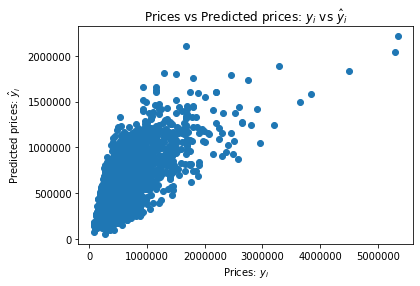

In [231]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")

plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")
plt.show()


# Simple Linear Regression

In [410]:
x = data.iloc[:,[5]].values
y = data.iloc[:,[2]].values

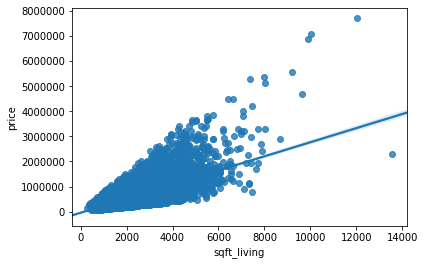

In [237]:
sns.regplot(x='sqft_living',y='price',data=data)

In [411]:
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:54:25   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.387e+04   4405.455     -9.958      0.000   -5.25e+04   -3.52e+04
x1           280.8067      1.938    144.924      0.000     277.009     284.605
==============================================================================
Omnibus:                    14815.593   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543533.863
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.911   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
x = data.iloc[:,[11]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:            -3.0125e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.057e+06   1.23e+04    -86.195      0.000   -1.08e+06   -1.03e+06
x1          2.086e+05   1583.062    131.770      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    19902.422   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043214.690
Skew:                           4.085   Prob(JB):                         0.00
Kurtosis:                      49.927   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
x = data.iloc[:,[12]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:05:36   Log-Likelihood:            -3.0268e+05
No. Observations:               21613   AIC:                         6.054e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.974e+04   4732.848     12.623      0.000    5.05e+04     6.9e+04
x1           268.6443      2.401    111.866      0.000     263.937     273.351
==============================================================================
Omnibus:                    16505.934   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           729337.804
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.699   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
x = data.iloc[:,[4]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:06:05   Log-Likelihood:            -3.0413e+05
No. Observations:               21613   AIC:                         6.083e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.047e+04   6214.660      1.684      0.092   -1714.314    2.26e+04
x1          2.505e+05   2761.302     90.713      0.000    2.45e+05    2.56e+05
==============================================================================
Omnibus:                    17272.178   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882972.925
Skew:                           3.455   Prob(JB):                         0.00
Kurtosis:                      33.541   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
x = data.iloc[:,[9]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4052.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:07:52   Log-Likelihood:            -3.0576e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.956e+05   2397.950    206.656      0.000    4.91e+05       5e+05
x1          1.905e+05   2992.500     63.653      0.000    1.85e+05    1.96e+05
==============================================================================
Omnibus:                    17915.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1030222.691
Skew:                           3.622   Prob(JB):                         0.00
Kurtosis:                      36.038   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
x = data.iloc[:,[13]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     2532.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:08:01   Log-Likelihood:            -3.0642e+05
No. Observations:               21613   AIC:                         6.128e+05
Df Residuals:                   21611   BIC:                         6.129e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.618e+05   2831.023    163.130      0.000    4.56e+05    4.67e+05
x1           268.8033      5.342     50.318      0.000     258.332     279.274
==============================================================================
Omnibus:                    17958.261   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           889286.574
Skew:                           3.695   Prob(JB):                         0.00
Kurtosis:                      33.543   Cond. No.                         635.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
x = data.iloc[:,[3]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)

regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2270.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:49:15   Log-Likelihood:            -3.0654e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.296e+05   8937.619     14.506      0.000    1.12e+05    1.47e+05
x1          1.218e+05   2555.949     47.649      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18848.009   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194538.337
Skew:                           3.901   Prob(JB):                         0.00
Kurtosis:                      38.575   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Feature Scaling

In [261]:
from sklearn.preprocessing import MinMaxScaler

In [278]:
data1= pd.DataFrame(data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement']])
minmaxscaler = MinMaxScaler()
data1 = minmaxscaler.fit_transform(data1)


In [294]:
data1

array([[0.09090909, 0.125     , 0.06716981, ..., 0.5       , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.5       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.41666667, 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.5       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.58333333, 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.5       , 0.08004386,
        0.        ]])

# Multiple Linear Regression

In [362]:
x1 = data.iloc[:,[5,11]].values
y1 = data.iloc[:,[2]].values
x1= np.append(arr=np.ones((21613,1)).astype(int),values = x1,axis = 1)
regressor_OLS=sm.OLS(endog=y1,exog=x1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:27:32   Log-Likelihood:            -2.9935e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21610   BIC:                         5.987e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.988e+05   1.33e+04    -45.006      0.000   -6.25e+05   -5.73e+05
x1           184.5258      2.870     64.288      0.000     178.900     190.152
x2          9.863e+04   2242.703     43.980      0.000    9.42e+04    1.03e+05
==============================================================================
Omnibus:                    16970.377   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004389.612
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.736   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [390]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y ,X = dmatrices('y1~ x1', data, return_type='dataframe')
vif_df = (pd.DataFrame())
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

        vif   features
0  0.000000  Intercept
1  0.000000      x1[0]
2  2.390732      x1[1]
3  2.390732      x1[2]


In [366]:
x2 = data.iloc[:,[5,11,12]].values
y2 = data.iloc[:,[2]].values
x2= np.append(arr=np.ones((21613,1)).astype(int),values = x2,axis = 1)
regressor_OLS=sm.OLS(endog=y2,exog=x2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8493.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:29:52   Log-Likelihood:            -2.9920e+05
No. Observations:               21613   AIC:                         5.984e+05
Df Residuals:                   21609   BIC:                         5.984e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.52e+05   1.36e+04    -48.103      0.000   -6.79e+05   -6.25e+05
x1           234.8361      4.040     58.134      0.000     226.918     242.754
x2          1.101e+05   2320.124     47.444      0.000    1.06e+05    1.15e+05
x3           -77.7866      4.426    -17.574      0.000     -86.462     -69.111
==============================================================================
Omnibus:                    17111.023   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1060372.422
Skew:                           3.331   Prob(JB):                         0.00
Kurtosis:                      36.661   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [367]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('y2 ~ x2', data, return_type='dataframe')
vif_df = (pd.DataFrame())
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

        vif   features
0  0.000000  Intercept
1  0.000000      x2[0]
2  4.802723      x2[1]
3  2.595094      x2[2]
4  4.687315      x2[3]


In [368]:
x3 = data.iloc[:,[5,11,12,4]].values
y3 = data.iloc[:,[2]].values
x3= np.append(arr=np.ones((21613,1)).astype(int),values = x3,axis = 1)
regressor_OLS=sm.OLS(endog=y3,exog=x3).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6433.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:32:46   Log-Likelihood:            -2.9914e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21608   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.51e+05   1.35e+04    -48.161      0.000   -6.78e+05   -6.25e+05
x1           252.7051      4.352     58.064      0.000     244.175     261.236
x2          1.151e+05   2360.621     48.779      0.000    1.11e+05     1.2e+05
x3           -76.9554      4.415    -17.431      0.000     -85.609     -68.302
x4          -3.71e+04   3418.501    -10.853      0.000   -4.38e+04   -3.04e+04
==============================================================================
Omnibus:                    17076.791   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1063891.108
Skew:                           3.319   Prob(JB):                         0.00
Kurtosis:                      36.724   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('y3 ~ x3', data, return_type='dataframe')
vif_df = (pd.DataFrame())
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

        vif   features
0  0.000000  Intercept
1  0.000000      x3[0]
2  5.604936      x3[1]
3  2.700996      x3[2]
4  4.688726      x3[3]
5  2.431607      x3[4]


In [370]:
x4= data.iloc[:,[11,12,4,9]].values
y4 = data.iloc[:,[2]].values
x4= np.append(arr=np.ones((21613,1)).astype(int),values = x4,axis = 1)
regressor_OLS=sm.OLS(endog=y4,exog=x4).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     6097.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:34:31   Log-Likelihood:            -2.9945e+05
No. Observations:               21613   AIC:                         5.989e+05
Df Residuals:                   21608   BIC:                         5.990e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.732e+05   1.37e+04    -49.179      0.000      -7e+05   -6.46e+05
x1          1.234e+05   2374.725     51.981      0.000    1.19e+05    1.28e+05
x2            98.2095      3.410     28.797      0.000      91.525     104.894
x3          3.054e+04   3213.595      9.503      0.000    2.42e+04    3.68e+04
x4          1.193e+05   2313.116     51.593      0.000    1.15e+05    1.24e+05
==============================================================================
Omnibus:                    17875.640   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1442404.701
Skew:                           3.482   Prob(JB):                         0.00
Kurtosis:                      42.411   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [393]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('y4 ~ x4', data, return_type='dataframe')
vif_df = (pd.DataFrame())
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


        vif   features
0  0.000000  Intercept
1  0.000000      x4[0]
2  2.655725      x4[1]
3  2.718443      x4[2]
4  2.087801      x4[3]
5  1.070913      x4[4]


In [372]:
x5 = data.iloc[:,[11,12,4,9,13]].values
y5 = data.iloc[:,[2]].values
x5= np.append(arr=np.ones((21613,1)).astype(int),values = x5,axis = 1)
regressor_OLS=sm.OLS(endog=y5,exog=x5).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     5871.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:36:28   Log-Likelihood:            -2.9835e+05
No. Observations:               21613   AIC:                         5.967e+05
Df Residuals:                   21607   BIC:                         5.968e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.753e+05   1.32e+04    -43.708      0.000   -6.01e+05   -5.49e+05
x1           1.04e+05   2291.691     45.385      0.000    9.95e+04    1.08e+05
x2           167.6052      3.544     47.288      0.000     160.658     174.552
x3         -2.991e+04   3299.610     -9.065      0.000   -3.64e+04   -2.34e+04
x4          9.222e+04   2268.181     40.657      0.000    8.78e+04    9.67e+04
x5           209.1246      4.330     48.302      0.000     200.638     217.611
==============================================================================
Omnibus:                    16616.964   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1088588.789
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      37.190   Cond. No.                     1.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('y5 ~ x5', data, return_type='dataframe')
vif_df = (pd.DataFrame())
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

        vif   features
0  0.000000  Intercept
1  0.000000      x5[0]
2  2.740179      x5[1]
3  3.252946      x5[2]
4  2.438612      x5[3]
5  1.140840      x5[4]
6  1.386477      x5[5]


In [374]:
x6 = data.iloc[:,[11,12,4,9,13,3]].values
y6 = data.iloc[:,[2]].values
x6= np.append(arr=np.ones((21613,1)).astype(int),values = x6,axis = 1)
regressor_OLS=sm.OLS(endog=y6,exog=x6).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4974.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:37:48   Log-Likelihood:            -2.9824e+05
No. Observations:               21613   AIC:                         5.965e+05
Df Residuals:                   21606   BIC:                         5.966e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.823e+05   1.46e+04    -33.056      0.000   -5.11e+05   -4.54e+05
x1          9.839e+04   2313.564     42.529      0.000    9.39e+04    1.03e+05
x2           186.1545      3.753     49.596      0.000     178.797     193.511
x3         -2.091e+04   3342.341     -6.255      0.000   -2.75e+04   -1.44e+04
x4          8.892e+04   2268.828     39.192      0.000    8.45e+04    9.34e+04
x5           230.9329      4.565     50.585      0.000     221.985     239.881
x6         -3.196e+04   2210.584    -14.459      0.000   -3.63e+04   -2.76e+04
==============================================================================
Omnibus:                    16241.956   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           984479.981
Skew:                           3.068   Prob(JB):                         0.00
Kurtosis:                      35.489   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [375]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('y6 ~ x6', data, return_type='dataframe')
vif_df = (pd.DataFrame())
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

        vif   features
0  0.000000  Intercept
1  0.000000      x6[0]
2  2.819628      x6[1]
3  3.683224      x6[2]
4  2.526276      x6[3]
5  1.152483      x6[4]
6  1.556363      x6[5]
7  1.611579      x6[6]


In [392]:
x = data.iloc[:,[11,12,4,9,17]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     6468.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:43:08   Log-Likelihood:            -2.9773e+05
No. Observations:               21613   AIC:                         5.955e+05
Df Residuals:                   21607   BIC:                         5.955e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.426e+07    5.5e+05    -62.331      0.000   -3.53e+07   -3.32e+07
x1          9.959e+04   2227.203     44.717      0.000    9.52e+04    1.04e+05
x2           121.0772      3.171     38.179      0.000     114.861     127.293
x3          3.409e+04   2967.921     11.485      0.000    2.83e+04    3.99e+04
x4          1.229e+05   2136.683     57.535      0.000    1.19e+05    1.27e+05
x5          7.091e+05   1.16e+04     61.123      0.000    6.86e+05    7.32e+05
==============================================================================
Omnibus:                    20203.074   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2330702.938
Skew:                           4.148   Prob(JB):                         0.00
Kurtosis:                      53.193   Cond. No.                     6.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Best model obtained from Multiple Regression

In [314]:
x = data.iloc[:,[5,11,9,17]].values
y = data.iloc[:,[2]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     9437.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:09:30   Log-Likelihood:            -2.9670e+05
No. Observations:               21613   AIC:                         5.934e+05
Df Residuals:                   21608   BIC:                         5.934e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.245e+07    5.2e+05    -62.362      0.000   -3.35e+07   -3.14e+07
x1           174.4178      2.570     67.860      0.000     169.380     179.456
x2          7.928e+04   1999.814     39.643      0.000    7.54e+04    8.32e+04
x3          9.968e+04   2055.952     48.482      0.000    9.56e+04    1.04e+05
x4          6.729e+05    1.1e+04     61.332      0.000    6.51e+05    6.94e+05
==============================================================================
Omnibus:                    19087.832   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1822537.766
Skew:                           3.826   Prob(JB):                         0.00
Kurtosis:                      47.331   Cond. No.                     7.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [ ]:


X = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)

# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

In [ ]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');
The code above yields the following plot